In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.feature_selection import f_regression

#this is for manually checking rows - we'll get there eventually
import random

filepath = r"C:\Users\jjap2\Poleto SCE\Poleto-SCE\dond_game_data.csv"
df = pd.read_csv(filepath)

#cleaning
df_c = df[(df["Postgame"] != 1) & (df["Offer"] != 0) & (df["Previous Offer"] != 0)]


In [3]:
# F TEST

# target variable
y = df_c["Offer"]

# Define features (all numerical + Case_X columns)
X = df_c.select_dtypes(include=[np.number]).drop(columns=["Offer", "Amount Won"])  # Exclude target

# how to F-Test
f_vals, p_vals = f_regression(X, y)

# Create a DataFrame to display results
f_test_res = pd.DataFrame({"Feature": X.columns, "F-Value": f_vals, "P-Value": p_vals})
f_test_res = f_test_res.sort_values(by="P-Value")

# feature results
display(f_test_res)

,Feature,F-Value,P-Value
3,Board Average,1846.416000,8.221190e-187
5,Previous Offer,1227.082326,2.939206e-148
9,Probability of Big Value,568.872980,2.271503e-89
2,Board Value,113.615935,1.905365e-24
6,Offer Percent of Average,44.491840,5.727032e-11
1,Round,31.684275,2.766248e-08
7,Deal,30.947350,3.969067e-08
4,Board Balance,4.637034,3.167963e-02
0,Game ID,2.428343,1.196766e-01
8,Postgame,0.000000,1.000000e+00


In [4]:
# select features based off F-Test
features = ["Board Average","Previous Offer","Probability of Big Value"]
target = "Offer"

# take the features so they can be split
X = df_c[features]
y = df_c[target]

# split into training and testing sets (80:20 train:test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# train the model
model = LinearRegression()
model.fit(X_train, y_train)

# predict based off test set
y_pred = model.predict(X_test)

# is it good enough
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(mae, r2)


25718.566041038095 0.7583005934170518


R^2 was .97 ish before switching off scalar and excluding values and f-test
- .97 with everything including scalar
- .9 without all features no scalar
- .88 excluding postgame and offer=0
- .75 when there was a previous offer

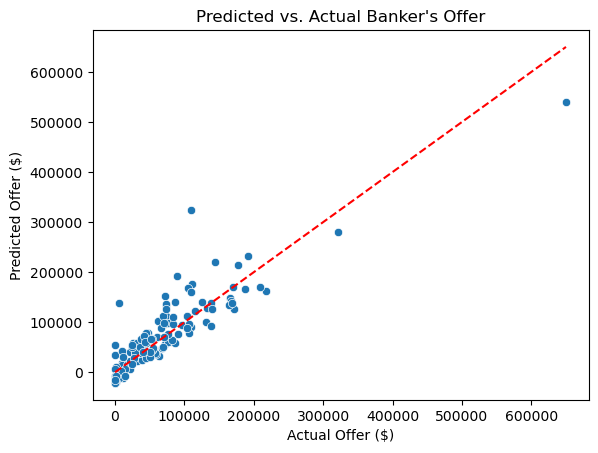

In [5]:
sns.scatterplot(x=y_test, y=y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='dashed')
plt.xlabel("Actual Offer ($)")
plt.ylabel("Predicted Offer ($)")
plt.title("Predicted vs. Actual Banker's Offer")

plt.show()